# Home Cage Dopamine Analysis

In [16]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from trial_class import *
from experiment_class import Experiment

from hc_extension import *
from bouts_extension import *

In [17]:
# NAc: #15616F
# mPFC: #FFAF00

# NAc
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac_csvs"
brain_region = '#15616F'

# mPFC
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\mpfc"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\mpfc_csvs"
# brain_region = '#FFAF00'

In [18]:
# # NAc: #15616F
# # mPFC: #FFAF00

# # NAc
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac_csvs"
# brain_region = '#15616F'

# # mPFC
# # experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\mpfc"
# # csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\mpfc_csvs"
# # brain_region = '#FFAF00'

In [19]:
# groups csv + experiment data into one variable
experiment = Experiment(experiment_path, csv_base_path)

# batch process the data, removing the specified time segments for subjects
experiment.default_batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac\n5-240823-085032\Notes.txt
read from t=0s to t=1789.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac\n6-240823-101436\Notes.txt
read from t=0s to t=1793.07s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac\n7-240824-062103\Notes.txt
read from t=0s to t=1803.56s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac\nn1-250120-063024\Notes.txt
read from t=0s to t=1833.87s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac\nn2-250120-072910\Notes.txt
read from t=0s to t=1774.16s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac\nn3-250121-074834\Notes.txt
read f

In [20]:
bout_definitions = [
    {'prefix': 'Short_Term', 'introduced': 'Short_Term_Introduced', 'removed': 'Short_Term_Removed'},
    {'prefix': 'Long_Term', 'introduced': 'Long_Term_Introduced', 'removed': 'Long_Term_Removed'},
    {'prefix': 'Novel', 'introduced': 'Novel_Introduced', 'removed': 'Novel_Removed'}
]

experiment.group_extract_manual_annotations(bout_definitions, first_only=True)

Processing behaviors for n5-240823-085032...
Processing behaviors for n6-240823-101436...
Processing behaviors for n7-240824-062103...
Processing behaviors for nn1-250120-063024...
Processing behaviors for nn2-250120-072910...
Processing behaviors for nn3-250121-074834...
Processing behaviors for nn4-250121-084228...
Processing behaviors for nn5-250120-081227...
Processing behaviors for nn6-250120-085156...
Processing behaviors for nn7-250121-094048...
Processing behaviors for nn8-250121-101912...


### Peak standard z-score

In [21]:
experiment.compute_all_da_metrics(max_bout_duration=4, 
                                  mode='standard')

Computing DA metrics for n5-240823-085032 ...
Computing DA metrics for n6-240823-101436 ...
Computing DA metrics for n7-240824-062103 ...
Computing DA metrics for nn1-250120-063024 ...
Computing DA metrics for nn2-250120-072910 ...
Computing DA metrics for nn3-250121-074834 ...
Computing DA metrics for nn4-250121-084228 ...
Computing DA metrics for nn5-250120-081227 ...
Computing DA metrics for nn6-250120-085156 ...
Computing DA metrics for nn7-250121-094048 ...
Computing DA metrics for nn8-250121-101912 ...


In [22]:
exp_da_dict = get_trial_dataframes(experiment)

In [23]:
desired_bouts = ['Short_Term-1', 'Novel-1', 'Short_Term-2', 'Long_Term-1']
da_metadata_df = create_da_metrics_dataframe(exp_da_dict, behavior="Investigation", desired_bouts=desired_bouts)

In [24]:
# Copy original DataFrame
ordered_df = da_metadata_df.copy()

# Desired bout order
desired_bout_order = ["Short_Term-1", "Short_Term-2", "Long_Term-1", "Novel-1"]

# 1. Filter and reorder Bout as categorical
ordered_df = ordered_df[ordered_df["Bout"].isin(desired_bout_order)].copy()
ordered_df["Bout"] = pd.Categorical(ordered_df["Bout"], categories=desired_bout_order, ordered=True)

# 2. Call the plot function (it will respect the categorical order when pivoted)

In [25]:
ordered_df.head()

,Subject,Bout,Behavior,AUC,Max Peak,Mean Z-score
0,n5,Short_Term-1,Investigation,26.632479,8.054272,0.402884
1,n5,Novel-1,Investigation,15.910623,5.071794,3.616550
2,n5,Short_Term-2,Investigation,2.260869,1.127879,0.665117
3,n5,Long_Term-1,Investigation,12.363876,5.721768,1.472228
4,n6,Short_Term-1,Investigation,17.511638,5.599135,3.726395


In [26]:
da_metadata_df

,Subject,Bout,Behavior,AUC,Max Peak,Mean Z-score
0,n5,Short_Term-1,Investigation,26.632479,8.054272,0.402884
1,n5,Novel-1,Investigation,15.910623,5.071794,3.616550
2,n5,Short_Term-2,Investigation,2.260869,1.127879,0.665117
3,n5,Long_Term-1,Investigation,12.363876,5.721768,1.472228
4,n6,Short_Term-1,Investigation,17.511638,5.599135,3.726395
5,n6,Novel-1,Investigation,5.554093,1.784356,0.295423
6,n6,Short_Term-2,Investigation,0.702057,0.513349,0.129956
7,n6,Long_Term-1,Investigation,-1.056775,-0.490078,-0.556710
8,n7,Short_Term-1,Investigation,4.655125,5.866668,5.597379
9,n7,Novel-1,Investigation,-1.142861,-0.951600,-1.007448


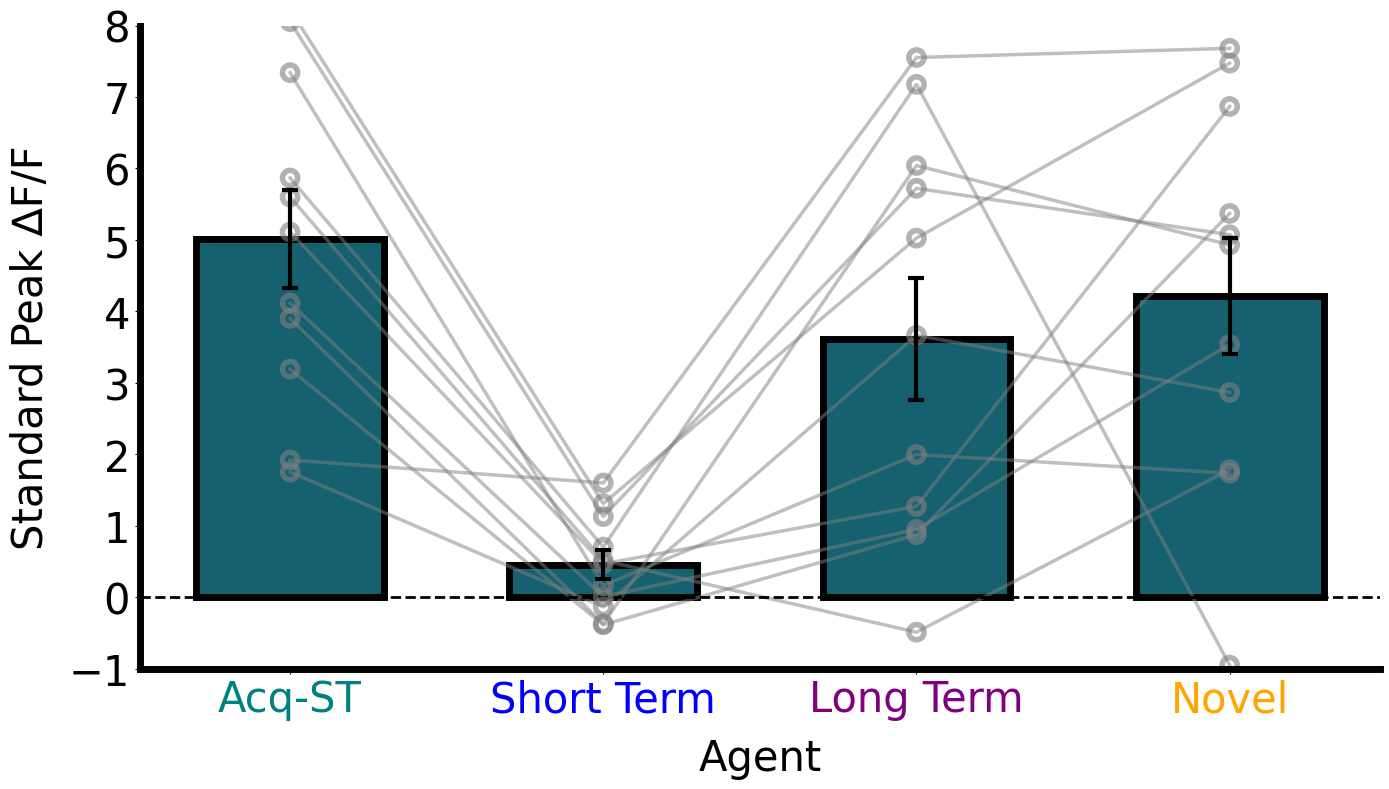


Paired t-test results (all pairwise combinations):
Short_Term-1 vs Short_Term-2: p = 0.0000 (***)
Short_Term-1 vs Long_Term-1: p = 0.2330 (ns)
Short_Term-1 vs Novel-1: p = 0.4968 (ns)
Short_Term-2 vs Long_Term-1: p = 0.0021 (**)
Short_Term-2 vs Novel-1: p = 0.0006 (***)
Long_Term-1 vs Novel-1: p = 0.5995 (ns)


In [27]:
plot_behavior_across_bouts_no_identities(
    metadata_df=ordered_df,
    y_col="Max Peak",
    ylabel="Standard Peak ∆F/F",
    xlabel="Agent",
    custom_xtick_labels=["Acq-ST", "Short Term", "Long Term", "Novel"],
    custom_xtick_colors=["teal", "blue", "purple", "orange"],
    ylim=(-1, 8),
    yticks_increment=1,
    bar_color=brain_region,
    figsize=(14, 8),
    save=None,
    save_name ="mDA",
    title=None
)

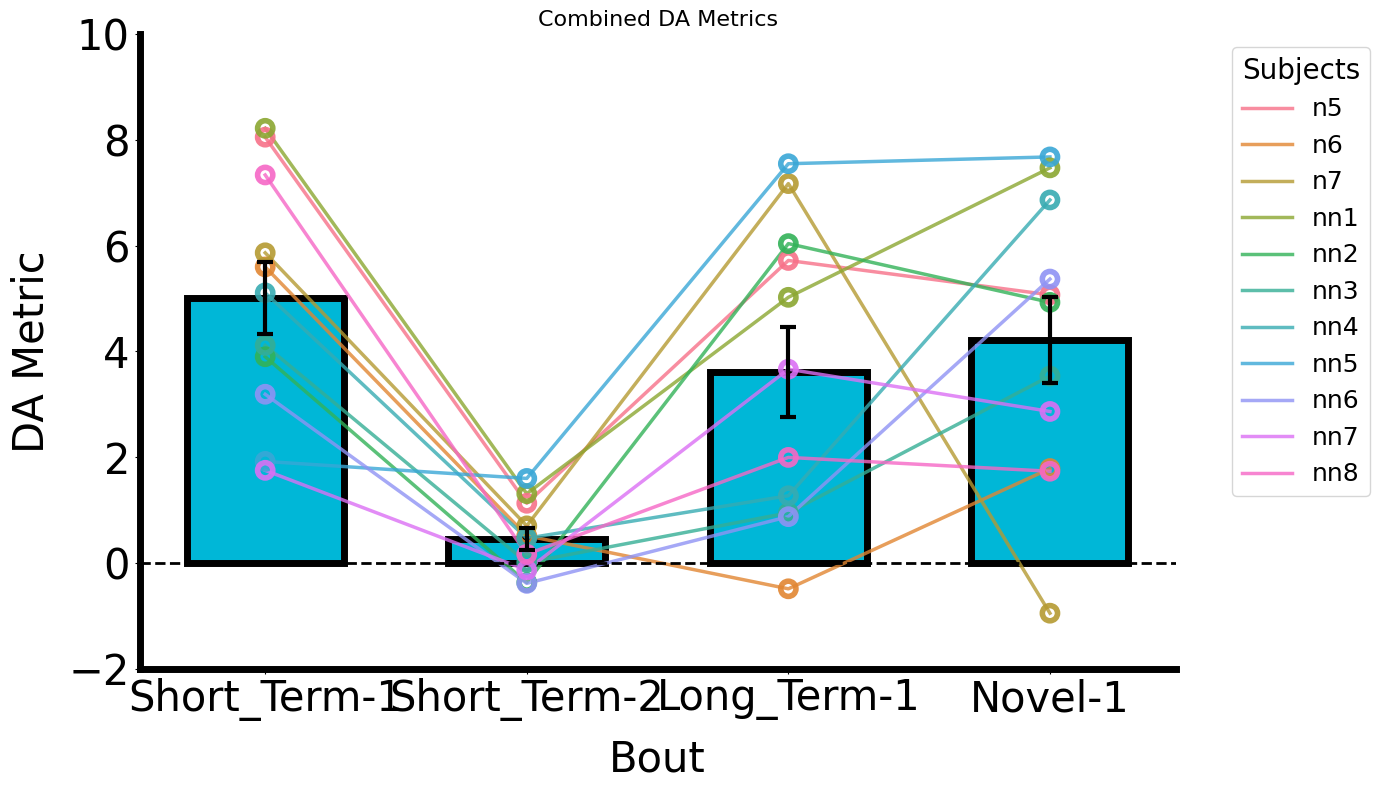

In [28]:
plot_behavior_across_bouts_with_identities(
    metadata_df=ordered_df,
    y_col="Max Peak",
    title="Combined DA Metrics", 
    ylabel="DA Metric", 
    xlabel="Bout", 
    custom_xtick_labels=None, 
    custom_xtick_colors=None, 
    ylim=(-2,10), 
    bar_color="#00B7D7", 
    yticks_increment=None, 
    figsize=(14,8), 
    pad_inches=0.1,
    save=False,
    save_name=None
)

In [29]:
experiment.reset_all_behaviors()
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = False)

# total_avg_bout_duration = metadata_df["Average Bout Duration"].mean()
# print(f"Total Average Bout Duration: {total_avg_bout_duration:.4f}")
# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(max_bout_duration=4,
                                  mode='standard')

Processing behaviors for n5-240823-085032...
Processing behaviors for n6-240823-101436...
Processing behaviors for n7-240824-062103...
Processing behaviors for nn1-250120-063024...
Processing behaviors for nn2-250120-072910...
Processing behaviors for nn3-250121-074834...
Processing behaviors for nn4-250121-084228...
Processing behaviors for nn5-250120-081227...
Processing behaviors for nn6-250120-085156...
Processing behaviors for nn7-250121-094048...
Processing behaviors for nn8-250121-101912...
Computing DA metrics for n5-240823-085032 ...
Computing DA metrics for n6-240823-101436 ...
Computing DA metrics for n7-240824-062103 ...
Computing DA metrics for nn1-250120-063024 ...
Computing DA metrics for nn2-250120-072910 ...
Computing DA metrics for nn3-250121-074834 ...
Computing DA metrics for nn4-250121-084228 ...
Computing DA metrics for nn5-250120-081227 ...
Computing DA metrics for nn6-250120-085156 ...
Computing DA metrics for nn7-250121-094048 ...
Computing DA metrics for nn8-2

## DA across Subsequent Bouts

In [30]:
exp_da_dict = get_trial_dataframes(experiment)

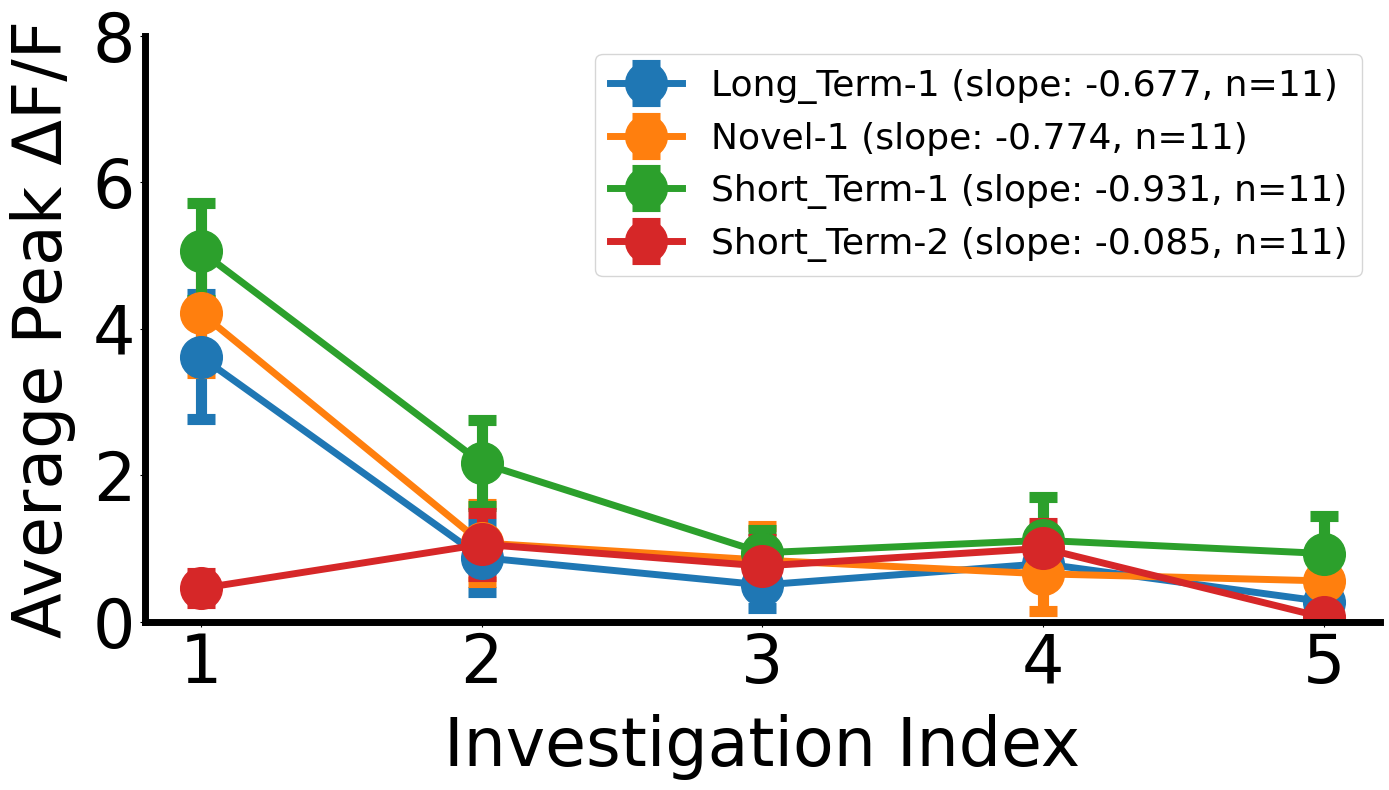


=== Computed Metric (SLOPE): ===
Bout: Long_Term-1, slope = -0.677
Bout: Novel-1, slope = -0.774
Bout: Short_Term-1, slope = -0.931
Bout: Short_Term-2, slope = -0.085


,Bout,BehaviorIndex,SubjectCount,AvgPeak,StdPeak,SEM
0,Long_Term-1,1,11,3.616314,2.829937,0.853258
1,Long_Term-1,2,11,0.874147,1.545640,0.466028
2,Long_Term-1,3,11,0.500709,1.042261,0.314253
3,Long_Term-1,4,10,0.791019,0.870234,0.275192
4,Long_Term-1,5,9,0.272651,0.612083,0.204028
5,Novel-1,1,11,4.214557,2.707041,0.816203
6,Novel-1,2,11,1.074482,1.783442,0.537728
7,Novel-1,3,11,0.840355,1.537244,0.463496
8,Novel-1,4,10,0.652830,1.603344,0.507022
9,Novel-1,5,8,0.555949,1.151138,0.406989


In [31]:
plot_peak_for_subsequent_behaviors(
    exp_da_dict,
    behavior="Investigation",
    selected_bouts=["Short_Term-1", "Short_Term-2", "Long_Term-1", "Novel-1"],
    n_subsequent_behaviors=5,
    peak_col="Max Peak",
    metric_type='slope', 
    xlabel="Investigation Index",
    ylabel="Average Peak ΔF/F",
    ylim=(0, 8),
    ytick_increment=2,
    plot_title="",
    save = False,
    save_path=r"Home_Cage_Plots\mPFC_DA\peaks_for_subsequent_behaviors.png" 
)